# Principal Component Analysis (PCA) - mtcars dataset
* PCA can be useful in EDA for Visualizing the variation amongst the data
* Simplify the original dataset - convert a number of variables, to a fewer number of Principal Components

## Retrieve Data - mtcars
* mtcars dataset is built into R
* It represents 32 different car models - with 11 Features
    * the 8th and 9th Features are Categorical
    * PCA will only use the Numerical Features

In [1]:
mtcars.pca <- prcomp(mtcars[,c(1:7,10,11)], center = TRUE,scale. = TRUE)

summary(mtcars.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3782 1.4429 0.71008 0.51481 0.42797 0.35184 0.32413
Proportion of Variance 0.6284 0.2313 0.05602 0.02945 0.02035 0.01375 0.01167
Cumulative Proportion  0.6284 0.8598 0.91581 0.94525 0.96560 0.97936 0.99103
                          PC8     PC9
Standard deviation     0.2419 0.14896
Proportion of Variance 0.0065 0.00247
Cumulative Proportion  0.9975 1.00000

#### There are now 9 Principal Components
* PC1 represents 62.84 % of the total variance - nearly 2/3 of the dataset info
* PC1 & PC2 represent 85.98 % of the total variance

#### View the PCA object

In [2]:
str(mtcars.pca)

List of 5
 $ sdev    : num [1:9] 2.378 1.443 0.71 0.515 0.428 ...
 $ rotation: num [1:9, 1:9] -0.393 0.403 0.397 0.367 -0.312 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:9] "mpg" "cyl" "disp" "hp" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:9] 20.09 6.19 230.72 146.69 3.6 ...
  ..- attr(*, "names")= chr [1:9] "mpg" "cyl" "disp" "hp" ...
 $ scale   : Named num [1:9] 6.027 1.786 123.939 68.563 0.535 ...
  ..- attr(*, "names")= chr [1:9] "mpg" "cyl" "disp" "hp" ...
 $ x       : num [1:32, 1:9] -0.664 -0.637 -2.3 -0.215 1.587 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


## Visualize PCA
* plot a biplot - using ggbiplot
* biplot reveals how the samples relate to each other within the PCA - and reveals how each variable influences each Principal Component

In [3]:
library(devtools)
install_github("vqv/ggbiplot")

from URL https://api.github.com/repos/vqv/ggbiplot/zipball/master
Installing ggbiplot
'/Library/Frameworks/R.framework/Resources/bin/R' --no-site-file --no-environ  \
  --no-save --no-restore --quiet CMD INSTALL  \
  '/private/var/folders/fn/10dyfg195751k6kfky4t_j7r0000gn/T/Rtmp8Zymmp/devtoolscf1d626ce293/vqv-ggbiplot-7325e88'  \
  --library='/Library/Frameworks/R.framework/Versions/3.5/Resources/library'  \
  --install-tests 



Loading required package: ggplot2
Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”Loading required package: plyr
Loading required package: scales
Loading required package: grid


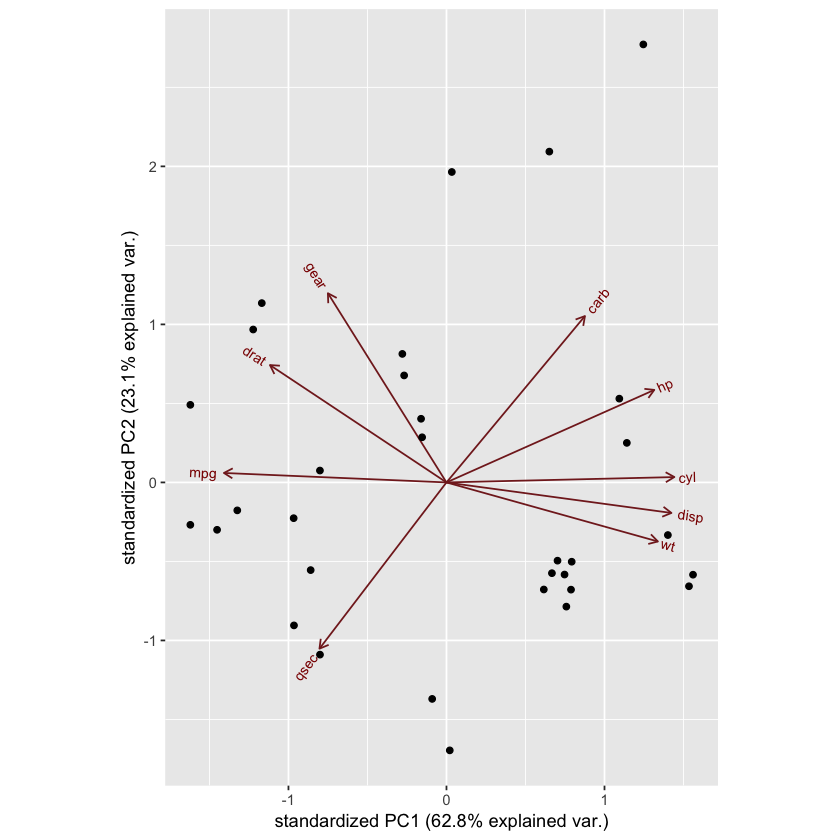

In [4]:
library(ggbiplot)

ggbiplot(mtcars.pca)

#### The labels assignment - names each point with the car name

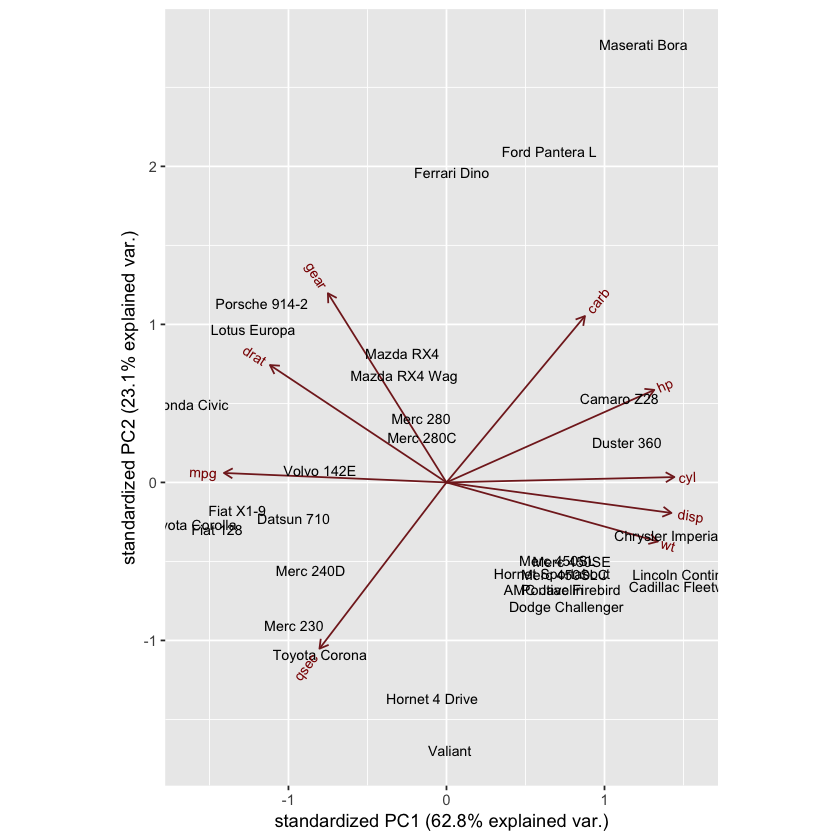

In [5]:
ggbiplot(mtcars.pca, labels=rownames(mtcars))

## Making Sense of the Results
* Create a List, for 3 Categories of Car origin - US, Japan, Europe
    * This is the Groups Assignment
* ellipse = TRUE - draws an ellipse around each Category

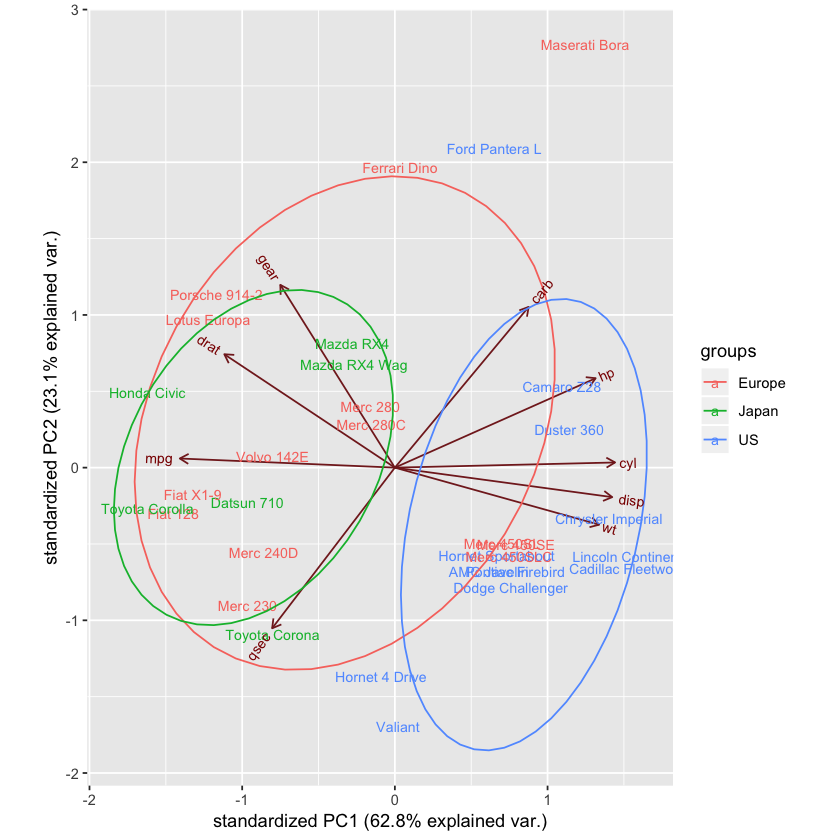

In [6]:
mtcars.country <- c(rep("Japan", 3), rep("US", 4), rep("Europe", 7), rep("US", 3),
                    "Europe", rep("Japan", 3), rep("US", 4), rep("Europe", 3), "US",
                    rep("Europe", 3))

ggbiplot(mtcars.pca, ellipse=TRUE, labels=rownames(mtcars), groups=mtcars.country)

## View PC3 and PC4

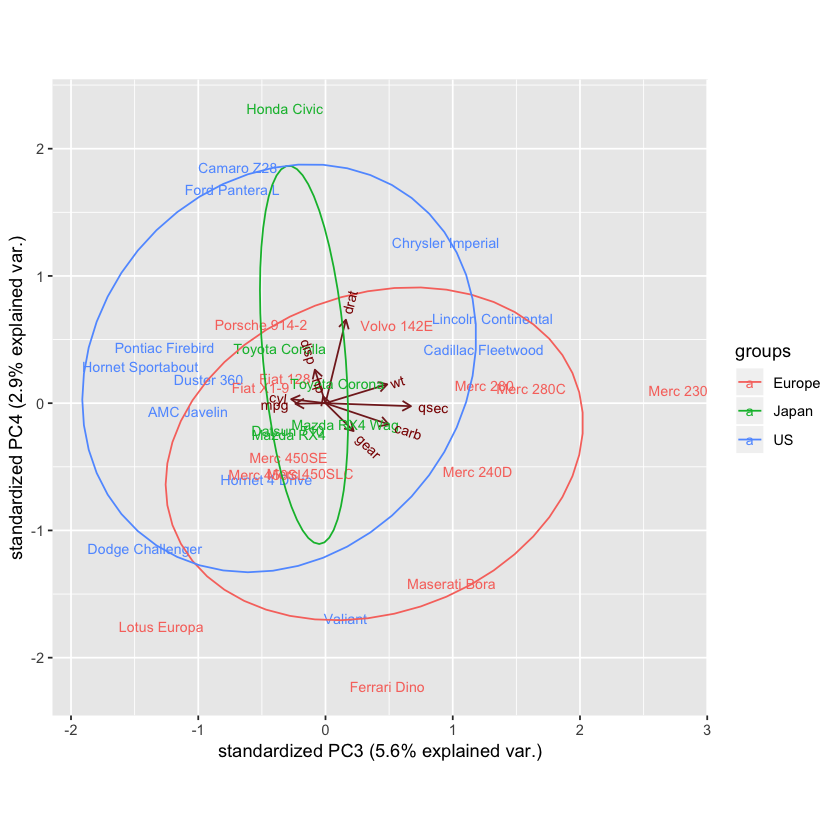

In [7]:
ggbiplot(mtcars.pca, ellipse=TRUE, choices=c(3,4),
         labels=rownames(mtcars), groups=mtcars.country)

# Customize the ggbiplot
### Place a Circle at the Center of the dataset
* use circle argument

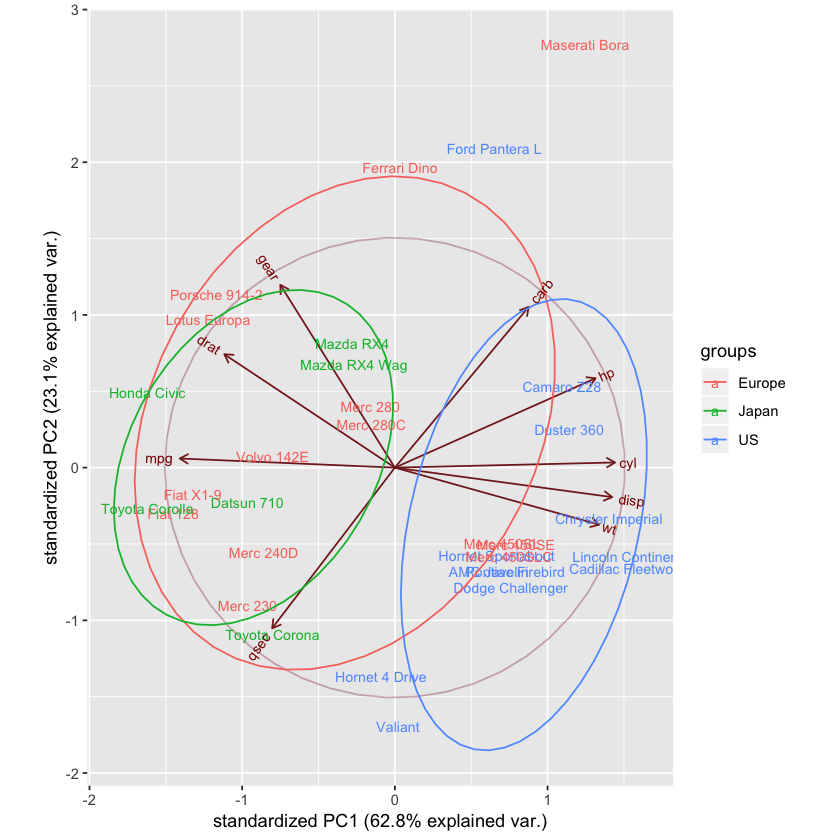

In [8]:
ggbiplot(mtcars.pca, ellipse=TRUE, circle=TRUE, labels=rownames(mtcars), groups=mtcars.country)

### Scale the Samples (aka observations) and Variables
* using obs.scale & var.scale

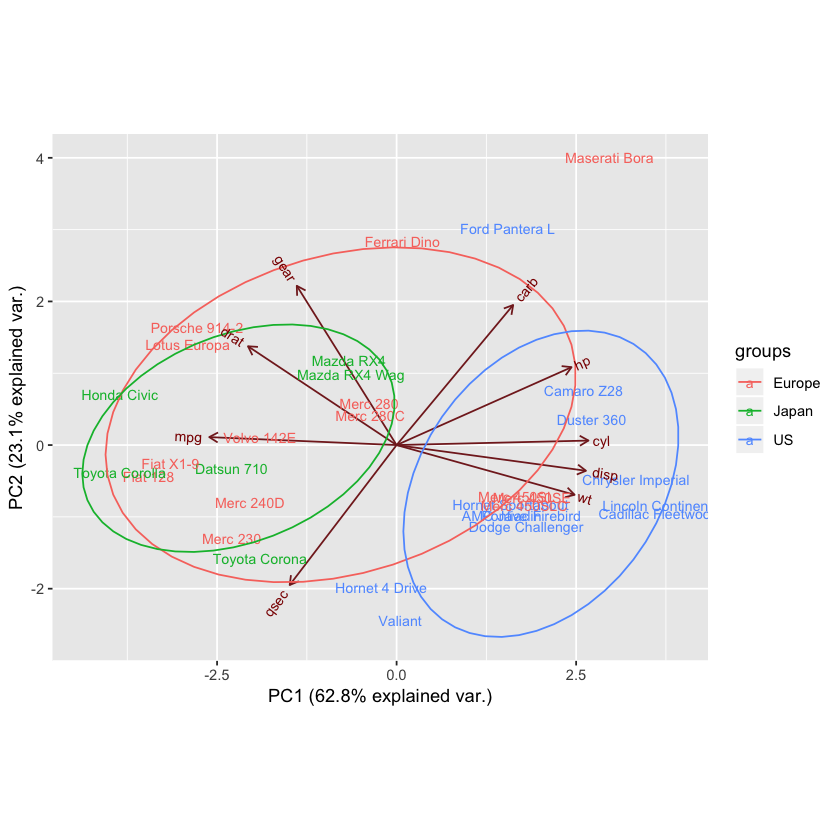

In [9]:
ggbiplot(mtcars.pca, ellipse=TRUE, obs.scale=1, var.scale=1,
         labels=rownames(mtcars), groups=mtcars.country)

### Remove the Arrows
* use var.axes

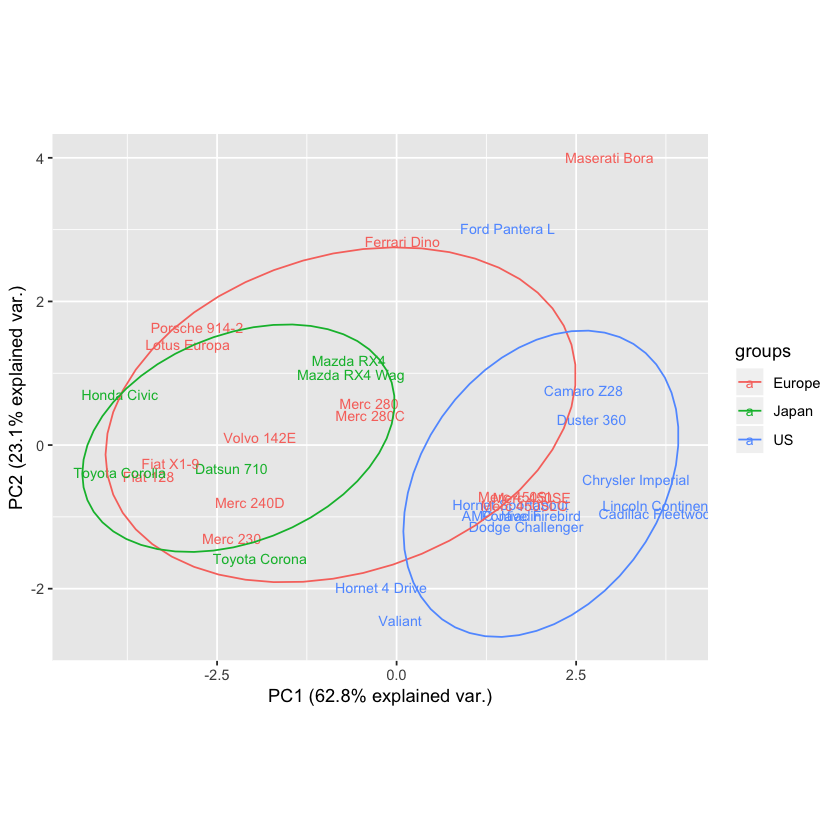

In [10]:
ggbiplot(mtcars.pca, ellipse=TRUE, obs.scale=1, var.scale=1, var.axes=FALSE,
         labels=rownames(mtcars), groups=mtcars.country)

### Use similar parameters as with ggplot - to alter the biplot
* specify colors - use scale_colour_manual( )
* add title - use ggtitle( )
* move legend - use theme( ) 
    * specify theme - use minimal( )

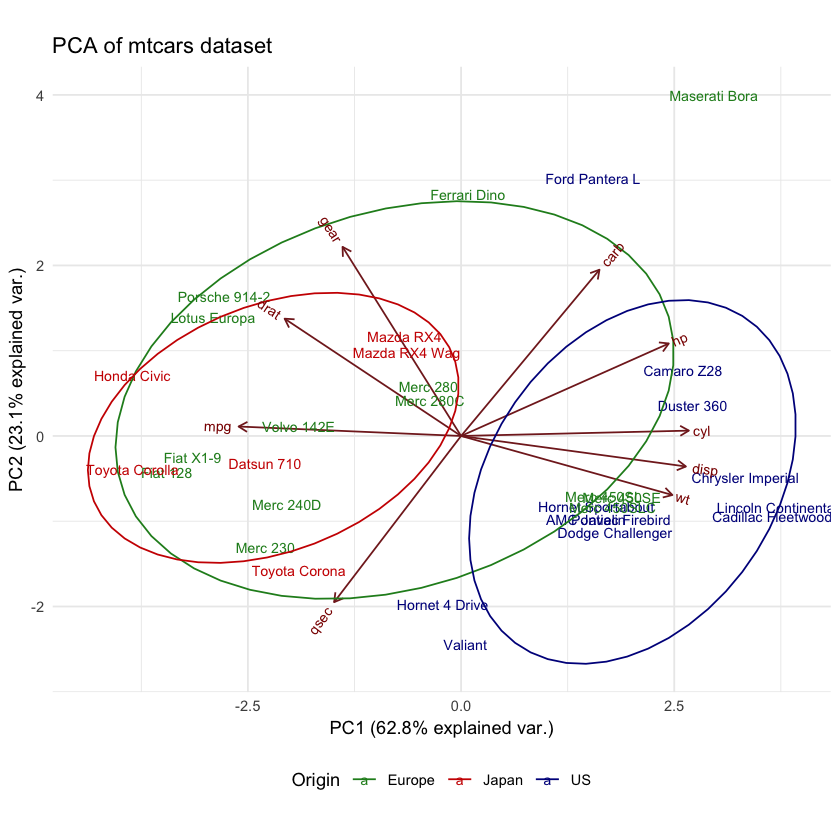

In [12]:
ggbiplot(mtcars.pca, ellipse=TRUE, obs.scale=1, var.scale=1,
         labels=rownames(mtcars), groups=mtcars.country) +
    scale_colour_manual(name="Origin", values=c("forest green", "red3", "dark blue")) +
    ggtitle("PCA of mtcars dataset") +
    theme_minimal() +
    theme(legend.position = "bottom")

# Add a New Sample - the Jupiter Spacecar
* incredibly fast 2.5 sec 1/4 mile, lightweight 500 lbs 
* 500 horsepower, superb fuel economy at 1000 mpg, with a 60-cylinder engine

### Supply stats for this vehicle - Add it to the existing dataset (mtcars)
* create a new dataset combining the 2 - mtcarsplus
* repeat the analysis as above

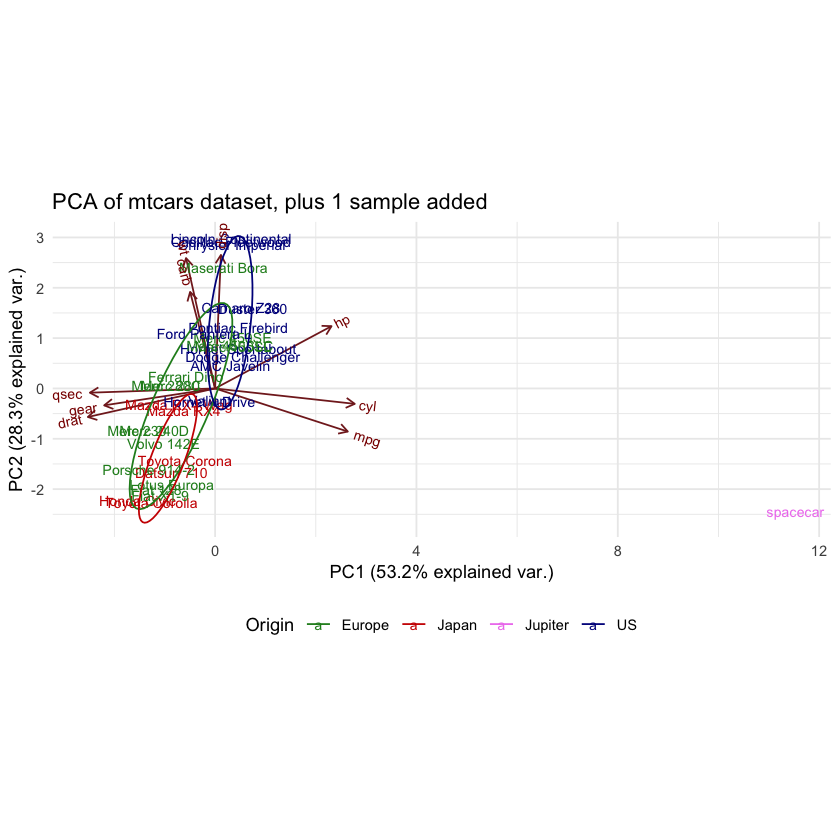

In [15]:
spacecar <- c(1000,60,50,500,0,0.5,2.5,0,1,0,0)

mtcarsplus <- rbind(mtcars, spacecar)

mtcars.countryplus <- c(mtcars.country, "Jupiter")

mtcarsplus.pca <- prcomp(mtcarsplus[,c(1:7,10,11)], center=TRUE, scale.=TRUE)

ggbiplot(mtcarsplus.pca, obs.scale=1, var.scale=1, ellipse=TRUE, circle=FALSE, var.axes=TRUE,
         labels=c(rownames(mtcars), "spacecar"), groups=mtcars.countryplus) +
    scale_colour_manual(name="Origin", values=c("forest green", "red3", "violet", "dark blue")) +
    ggtitle("PCA of mtcars dataset, plus 1 sample added") +
    theme_minimal() +
    theme(legend.position = "bottom")

### The PCA shape has significantly changed by adding the Spacecar
* the correlations are not the same
* certain variables (like cyl and mpg) are not as representative
* the New Sample is an extreme outlier

#### It is possible to *project* this New Sample *onto* the original PCA
* those Principal Components would not be affected by the Spacecar

## Project a Sample onto an Earlier PCA
* compute where the Spacecar is in relation to the original PCA - by applying the PCA transformations to the Spacecar
* scale Spacecar values in relation to PCA's center - mtcars.pca center
    * apply PCA matrix rotation to Spacecar
    * rbind( ) the projected values of Spacecar to the PCA matrix

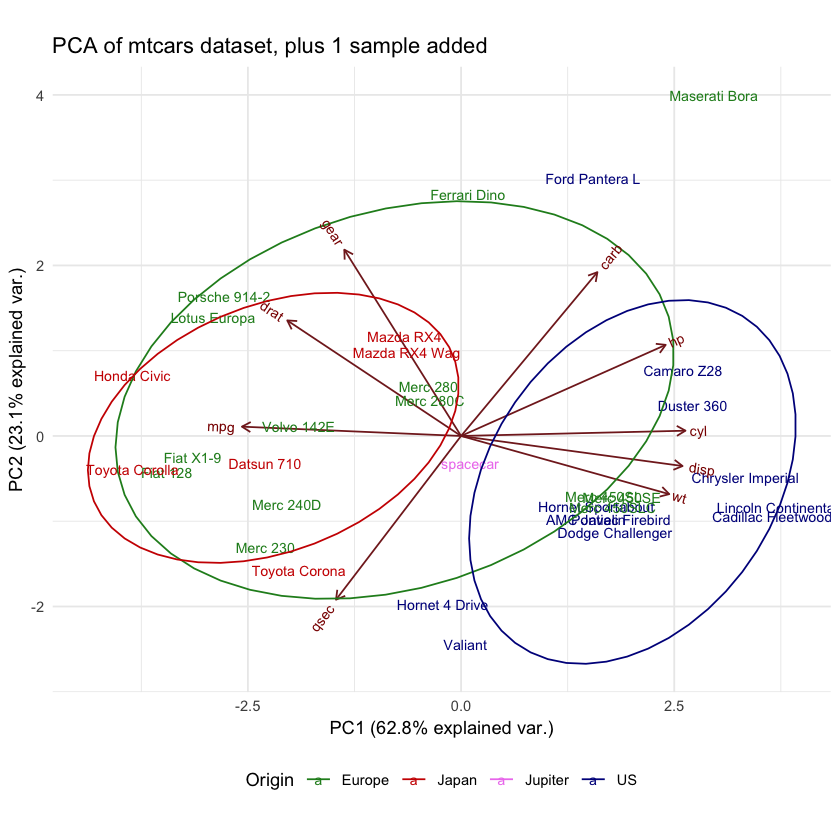

In [16]:
s.sc <- scale(t(spacecar[c(1:7,10,11)]), center=mtcars.pca$center)

s.pred <- s.sc %*% mtcars.pca$rotation

mtcars.plusproj.pca <- mtcars.pca
mtcars.plusproj.pca$x <- rbind(mtcars.plusproj.pca$x, s.pred)

ggbiplot(mtcars.plusproj.pca, obs.scale=1, var.scale=1, ellipse=TRUE, circle=FALSE,
         var.axes=TRUE, labels=c(rownames(mtcars), "spacecar"), groups=mtcars.countryplus) +
    scale_colour_manual(name="Origin", values=c("forest green", "red3", "violet", "dark blue")) +
    ggtitle("PCA of mtcars dataset, plus 1 sample added") +
    theme_minimal() +
    theme(legend.position="bottom")

#### The projection is different. The Spacecar is placed at the center, unable to be assigned to a particular group. Both of the above approaches can be useful
* the initial addition of the Spacecar - reveals it as an Outlier
* the projection of the Spacecar to the initial PCA - reveal it as unable to be grouped